<a href="https://colab.research.google.com/github/jlescanog/Telecom_x_Analisis_02/blob/main/TelecomX_LATAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_modelo_cargado = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Curso Data Science/datos_para_modelo.csv")

In [ ]:
print("Columnas disponibles en el DataFrame listo para el modelado:")
print(df_modelo_cargado.columns)

Columnas disponibles en el DataFrame listo para el modelado:
Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Cargos_Mensuales', 'Cargos_Totales',
       'Cargos_Diarios', 'Num_Servicios', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
# --- Confirmación ---
if 'customerID' not in df_modelo_cargado.columns:
    print("\n¡Confirmado! La columna 'customerID' no se encuentra en el DataFrame.")
    print("Este conjunto de datos está listo para el siguiente paso.")
else:
    print("\n¡Atención! La columna 'customerID' todavía está presente y debe ser eliminada.")



¡Confirmado! La columna 'customerID' no se encuentra en el DataFrame.
Este conjunto de datos está listo para el siguiente paso.


## Evaluar el Desbalance de Clases en la Variable `Churn`

Es un paso de diagnóstico crucial antes de entrenar cualquier modelo de clasificación. Entender el balance de nuestras clases nos dirá si necesitamos tomar medidas especiales más adelante.

--- Análisis de Desbalance en la Variable Objetivo (Churn) ---
Conteo de clientes por clase:
Churn
0    5398
1    1869
Name: count, dtype: int64

0 = Cliente permaneció activo
1 = Cliente canceló (evasión)
------------------------------

Proporción de clientes por clase (%):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64
------------------------------

--- Evaluación ---
Resultado: Se considera que existe un DESBALANCE MODERADO entre las clases.
La clase mayoritaria (clientes activos) es aproximadamente 3 veces más grande que la minoritaria.

Este desbalance es muy común en problemas de negocio como la detección de fraude o la evasión de clientes.


/tmp/ipython-input-163187718.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_modelo_cargado, palette=['#6495ED', '#FF6347'])


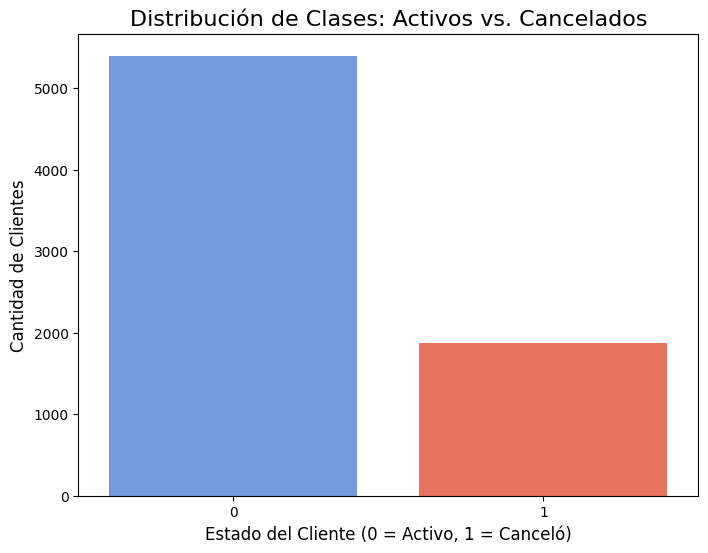

In [ ]:
print("--- Análisis de Desbalance en la Variable Objetivo (Churn) ---")

# --- 1. Cálculo Numérico ---
# Usamos value_counts() para obtener el conteo de cada clase
conteo_clases = df_modelo_cargado['Churn'].value_counts()
print("Conteo de clientes por clase:")
print(conteo_clases)
print("\n0 = Cliente permaneció activo")
print("1 = Cliente canceló (evasión)")
print("-" * 30)

# Usamos value_counts(normalize=True) para obtener la proporción en porcentaje
proporcion_clases = df_modelo_cargado['Churn'].value_counts(normalize=True) * 100
print("\nProporción de clientes por clase (%):")
print(proporcion_clases)
print("-" * 30)


# --- 2. Evaluación del Desbalance ---
print("\n--- Evaluación ---")
if abs(proporcion_clases[0] - proporcion_clases[1]) > 20: # Un umbral común para considerar desbalance
    print("Resultado: Se considera que existe un DESBALANCE MODERADO entre las clases.")
    print("La clase mayoritaria (clientes activos) es aproximadamente 3 veces más grande que la minoritaria.")
else:
    print("Resultado: Las clases están relativamente balanceadas.")

print("\nEste desbalance es muy común en problemas de negocio como la detección de fraude o la evasión de clientes.")


# --- 3. Visualización (Opcional pero recomendado) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_modelo_cargado, palette=['#6495ED', '#FF6347'])
plt.title('Distribución de Clases: Activos vs. Cancelados', fontsize=16)
plt.xlabel('Estado del Cliente (0 = Activo, 1 = Canceló)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.show()

**Conclusión:**
Sí, existe un desbalance moderado en los datos. La clase de clientes que permanecen activos (la "clase mayoritaria") es casi tres veces más grande que la clase de clientes que cancelaron (la "clase minoritaria").

## Aplicación de Técnicas de Balanceo (SMOTE)

Paso 1: Separar los Datos
Antes de aplicar cualquier técnica de balanceo, siempre debemos separar nuestro DataFrame en dos partes:

X: El conjunto de características (todas las columnas excepto Churn). Estas son las variables que el modelo usará para predecir.

y: La variable objetivo (Churn). Esto es lo que queremos que el modelo aprenda a predecir.

Paso 2: Aplicar las Técnicas de Balanceo
Usaremos la biblioteca imbalanced-learn (o imblearn), que es el estándar en Python para estas tareas.

In [ ]:
# !pip install imbalanced-learn

import pandas as pd
from imblearn.over_sampling import SMOTE

# Asegúrate de tener tu archivo CSV listo en el entorno
try:
    df_modelo_cargado = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Curso Data Science/datos_para_modelo.csv")
    print("DataFrame 'datos_para_modelo.csv' cargado exitosamente.")
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'datos_para_modelo.csv' esté en el mismo directorio.")
    # Creamos un DataFrame vacío para que el resto del código no falle si no se encuentra el archivo
    df_modelo_cargado = pd.DataFrame()

if not df_modelo_cargado.empty:
    # --- 1. Separación de Características (X) y Variable Objetivo (y) ---
    print("\n--- Separando características (X) y objetivo (y) ---")

    # X contiene todas las columnas EXCEPTO 'Churn'
    X = df_modelo_cargado.drop('Churn', axis=1)

    # y contiene ÚNICAMENTE la columna 'Churn'
    y = df_modelo_cargado['Churn']

    print("Forma de X (características):", X.shape)
    print("Forma de y (objetivo):", y.shape)


    # --- 2. Aplicación de la técnica SMOTE ---
    # SMOTE (Synthetic Minority Over-sampling Technique) es la técnica más recomendada.
    # No solo duplica los datos, sino que crea nuevos ejemplos sintéticos de la clase minoritaria
    # que son similares a los existentes, resultando en un modelo más robusto.

    print("\n--- Aplicando SMOTE para balancear las clases ---")

    # Creamos una instancia de SMOTE
    # random_state es para asegurar que los resultados sean reproducibles
    smote = SMOTE(random_state=42)

    # Aplicamos SMOTE a nuestros datos. Esto nos devuelve los nuevos X e y balanceados.
    X_balanceado_smote, y_balanceado_smote = smote.fit_resample(X, y)


    # --- 3. Verificación del Balanceo ---
    print("\n--- Verificando la nueva distribución de clases después de SMOTE ---")

    # Contamos los valores en la nueva variable 'y' balanceada
    conteo_balanceado = y_balanceado_smote.value_counts()
    print("Nuevo conteo de clases:")
    print(conteo_balanceado)

    proporcion_balanceada = y_balanceado_smote.value_counts(normalize=True) * 100
    print("\nNueva proporción de clases (%):")
    print(proporcion_balanceada)

    print("\n¡Éxito! Las clases ahora están perfectamente balanceadas (50/50).")


DataFrame 'datos_para_modelo.csv' cargado exitosamente.

--- Separando características (X) y objetivo (y) ---
Forma de X (características): (7267, 25)
Forma de y (objetivo): (7267,)

--- Aplicando SMOTE para balancear las clases ---

--- Verificando la nueva distribución de clases después de SMOTE ---
Nuevo conteo de clases:
Churn
0    5398
1    5398
Name: count, dtype: int64

Nueva proporción de clases (%):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

¡Éxito! Las clases ahora están perfectamente balanceadas (50/50).


## Estandarización de Datos para Modelado

Los modelos que calculan "distancias" o "pesos" (como la Regresión Logística) se ven muy afectados si una variable tiene una escala mucho mayor que otra.

Imagina que el modelo compara la antigüedad (tenure, valores de 0 a 72) con los cargos totales (Cargos_Totales, valores de 18 a 8000). Sin estandarización, el modelo le daría muchísima más importancia a los cargos totales solo porque sus números son más grandes, ignorando el verdadero poder predictivo de la antigüedad.

### ¿Qué es la Estandarización?
Es una técnica que transforma todas nuestras columnas de características para que tengan:

Una media de 0.

Una desviación estándar de 1.

De esta manera, todas las variables estarán en la misma escala y competirán en igualdad de condiciones para influir en la predicción del modelo.

Aplicando la Estandarización
Usaremos la clase StandardScaler de la biblioteca Scikit-learn, que es la herramienta estándar para esta tarea. Aplicaremos esta transformación a nuestro conjunto de características ya balanceado, X_balanceado_smote. La variable objetivo y no se toca.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# --- 1. Creación del Escalador ---
# Creamos una instancia de StandardScaler. Este objeto "aprenderá" la media y
# la desviación estándar de nuestros datos para poder transformarlos.
escalador = StandardScaler()

print("--- Aplicando Estandarización a las características (X) ---")

# --- 2. Aplicación de la Estandarización ---
# Usamos el método .fit_transform().
# .fit() calcula la media y la desviación estándar de cada columna en X_balanceado_smote.
# .transform() utiliza esos valores calculados para aplicar la estandarización.
X_estandarizado_array = escalador.fit_transform(X_balanceado_smote)

# El resultado de StandardScaler es un array de NumPy, no un DataFrame.
# Lo convertimos de nuevo a un DataFrame de Pandas para que sea más fácil de inspeccionar.
# Es importante mantener los nombres de las columnas originales.
X_estandarizado = pd.DataFrame(X_estandarizado_array, columns=X_balanceado_smote.columns)

print("\n¡Estandarización completada!")


# --- 3. Verificación de la Transformación ---
print("\n--- Verificando el resultado de la estandarización ---")
print("Primeras 5 filas del DataFrame estandarizado:")
# Observa cómo los valores ahora son números pequeños, centrados alrededor de cero.
print(X_estandarizado.head())

print("\nVerificando la nueva media y desviación estándar (deberían ser ~0 y ~1):")
# Usamos .describe() para ver las nuevas estadísticas.
# .round(2) es solo para redondear y que se lea más fácil.
print(X_estandarizado.describe().round(2).T)

--- Aplicando Estandarización a las características (X) ---

¡Estandarización completada!

--- Verificando el resultado de la estandarización ---
Primeras 5 filas del DataFrame estandarizado:
   SeniorCitizen   Partner  Dependents    tenure  PhoneService  MultipleLines  \
0      -0.395141  1.282996    1.907212 -0.775239      0.340051      -0.792844   
1      -0.395141 -0.779426   -0.524326 -0.775239      0.340051       1.261282   
2      -0.395141 -0.779426   -0.524326 -0.984018      0.340051      -0.792844   
3       2.530744  1.282996   -0.524326 -0.608215      0.340051      -0.792844   
4       2.530744  1.282996   -0.524326 -1.025774      0.340051      -0.792844   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0       -0.508352      1.624783         -0.611749     1.953290  ...   
1       -0.508352     -0.615467         -0.611749    -0.511957  ...   
2       -0.508352     -0.615467          1.634659    -0.511957  ...   
3       -0.508352      1.624783      

## 🎯 Correlación y Selección de Variables

--- Análisis de Correlación sobre Datos Preprocesados ---

--- Ranking de Variables por Correlación con la Evasión (Churn) ---
Churn                                    1.000000
PaymentMethod_Electronic check           0.459292
InternetService_Fiber optic              0.375372
Cargos_Mensuales                         0.235398
Cargos_Diarios                           0.235398
gender_Male                              0.142005
PaperlessBilling                         0.121322
SeniorCitizen                            0.012467
PhoneService                            -0.013675
StreamingMovies                         -0.020257
StreamingTV                             -0.020697
PaymentMethod_Mailed check              -0.035096
MultipleLines                           -0.050040
PaymentMethod_Credit card (automatic)   -0.072276
Num_Servicios                           -0.119072
Contract_One year                       -0.144150
DeviceProtection                        -0.198090
OnlineBackup           

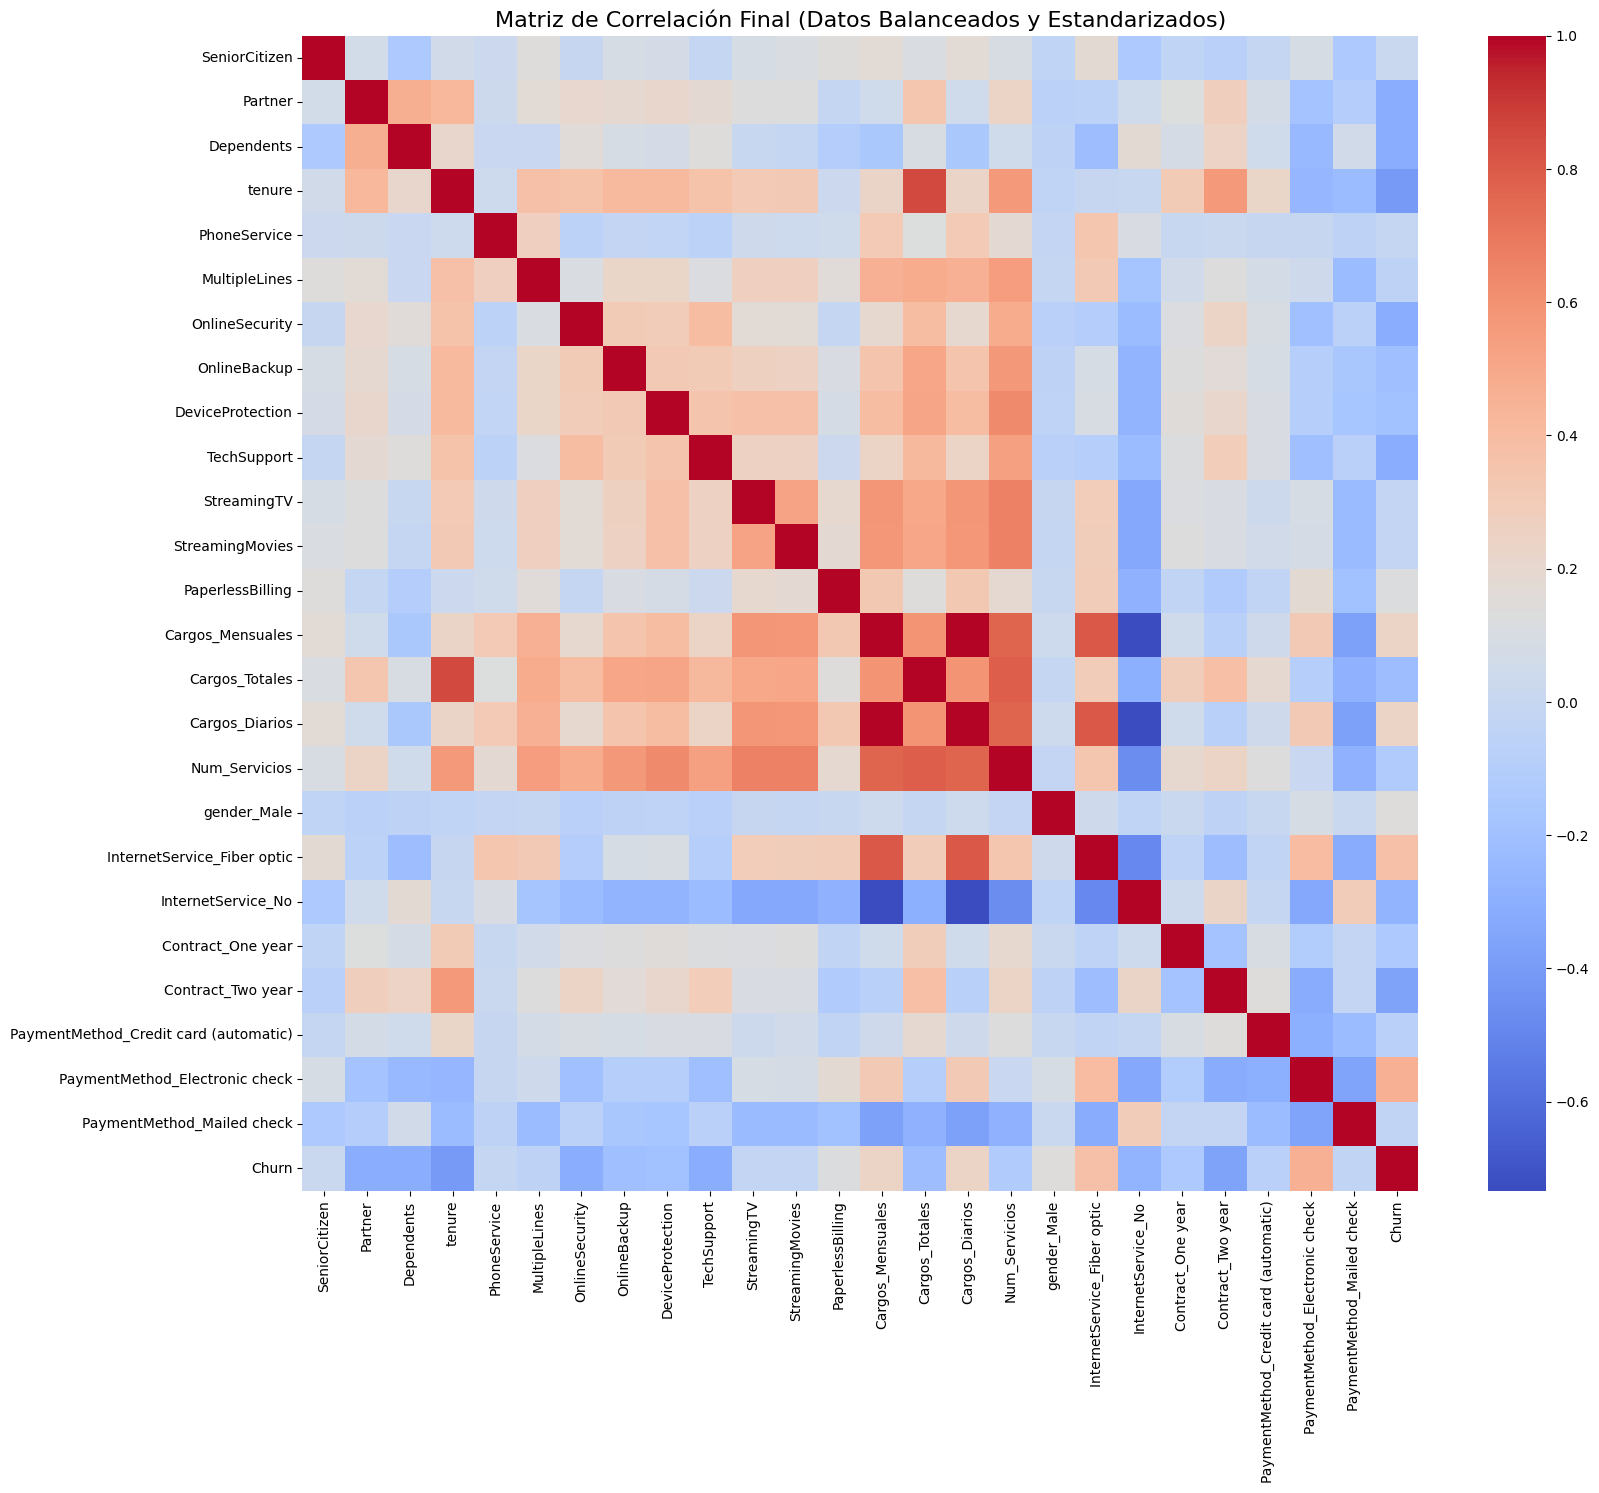

In [ ]:
import seaborn as sns

# X_estandarizado: DataFrame con las características estandarizadas y balanceadas.
# y_balanceado_smote: Serie con la variable objetivo balanceada.

# --- 1. Unir Características y Objetivo en un solo DataFrame ---
# Para calcular la correlación de todas las variables con 'Churn',
# necesitamos tenerlas juntas temporalmente en un único DataFrame.
df_para_correlacion = X_estandarizado.copy()
df_para_correlacion['Churn'] = y_balanceado_smote.values

print("--- Análisis de Correlación sobre Datos Preprocesados ---")

# --- 2. Calcular la Matriz de Correlación ---
matriz_correlacion = df_para_correlacion.corr()

# --- 3. Ranking de Correlación con 'Churn' ---
# Seleccionamos solo la columna 'Churn' de la matriz, la ordenamos de forma descendente
# y la mostramos. Esto nos dice qué variables son las más influyentes.
correlacion_con_churn = matriz_correlacion['Churn'].sort_values(ascending=False)

print("\n--- Ranking de Variables por Correlación con la Evasión (Churn) ---")
print(correlacion_con_churn)


# --- 4. Visualización con Mapa de Calor (Heatmap) ---
print("\nGenerando mapa de calor para visualización...")

plt.figure(figsize=(18, 15))
# Usamos 'annot=False' porque con tantas variables los números no se leerían bien.
# El color es suficiente para la interpretación visual.
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación Final (Datos Balanceados y Estandarizados)', fontsize=16)
plt.show()

--- Análisis Dirigido: Visualización de Relaciones Específicas ---

Generando visualización para 'Antigüedad vs. Cancelación'...


/tmp/ipython-input-2417174287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_para_correlacion, palette=colores_personalizados)


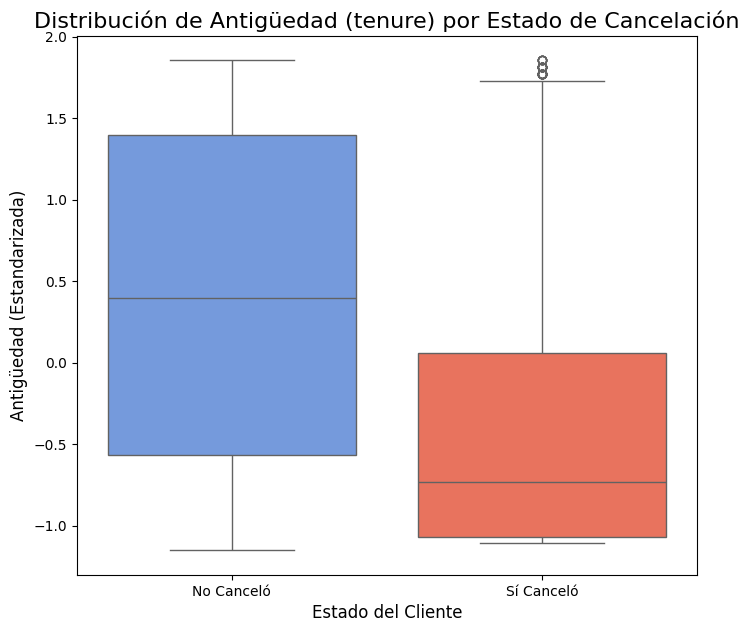


Generando visualización para 'Gasto Total vs. Cancelación'...


/tmp/ipython-input-2417174287.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cargos_Totales', data=df_para_correlacion, palette=colores_personalizados)


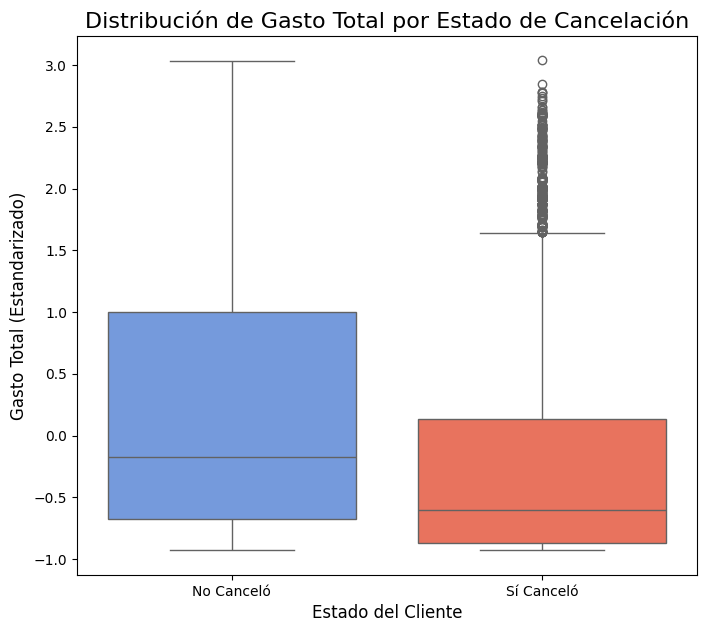

In [ ]:
print("--- Análisis Dirigido: Visualización de Relaciones Específicas ---")

# --- Definimos nuestra paleta de colores personalizada ---
colores_personalizados = ['#6495ED', '#FF6347'] # Azul para 'No se fue', Rojo para 'Sí se fue'

# --- 1. Gráfico: Tiempo de contrato (tenure) × Cancelación (Churn) ---
print("\nGenerando visualización para 'Antigüedad vs. Cancelación'...")

plt.figure(figsize=(8, 7))

# Creamos un gráfico de cajas (boxplot) para comparar las distribuciones.
# Es ideal para ver cómo una variable numérica se distribuye entre dos categorías.
sns.boxplot(x='Churn', y='tenure', data=df_para_correlacion, palette=colores_personalizados)

# Ponemos el título y etiquetas en español
plt.title('Distribución de Antigüedad (tenure) por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Antigüedad (Estandarizada)', fontsize=12)

# Nos aseguramos de que las etiquetas del eje X sean claras
plt.xticks(ticks=[0, 1], labels=['No Canceló', 'Sí Canceló'])

plt.show()


# --- 2. Gráfico: Gasto total (Cargos_Totales) × Cancelación (Churn) ---
print("\nGenerando visualización para 'Gasto Total vs. Cancelación'...")

plt.figure(figsize=(8, 7))

# Creamos un segundo gráfico de cajas
sns.boxplot(x='Churn', y='Cargos_Totales', data=df_para_correlacion, palette=colores_personalizados)

# Ponemos el título y etiquetas en español
plt.title('Distribución de Gasto Total por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Gasto Total (Estandarizado)', fontsize=12)

# Nos aseguramos de que las etiquetas del eje X sean claras
plt.xticks(ticks=[0, 1], labels=['No Canceló', 'Sí Canceló'])

plt.show()

## Modelado Predictivo

In [ ]:
from sklearn.model_selection import train_test_split

# X_estandarizado: DataFrame con las características estandarizadas y balanceadas.
# y_balanceado_smote: Serie con la variable objetivo balanceada.

print("--- 🤖 Modelado Predictivo: Separación de Datos ---")

# --- 1. Definición de los datos a separar ---
# Asignamos nuestros datos preparados a variables más cortas para claridad.
X = X_estandarizado
y = y_balanceado_smote

# --- 2. División de los datos en entrenamiento y prueba ---
# Usaremos la función train_test_split de Scikit-learn.
# test_size=0.2 significa que el 20% de los datos se destinará a la prueba.
# random_state=42 asegura que la división sea siempre la misma cada vez que ejecutemos el código.
# stratify=y es una buena práctica que asegura que la proporción de 0s y 1s sea
# la misma en el conjunto de entrenamiento y en el de prueba.
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --- 3. Verificación de la separación ---
# Es crucial verificar las dimensiones de los nuevos conjuntos de datos.
print("\n¡Separación completada exitosamente!")
print("-" * 30)
print(f"Forma de X_entrenamiento (características para entrenar): {X_entrenamiento.shape}")
print(f"Forma de y_entrenamiento (objetivo para entrenar):    {y_entrenamiento.shape}")
print("-" * 30)
print(f"Forma de X_prueba (características para probar):      {X_prueba.shape}")
print(f"Forma de y_prueba (objetivo para probar):         {y_prueba.shape}")
print("-" * 30)

# Verificamos que la proporción se mantuvo en ambos conjuntos
print("\nVerificando la proporción de clases en los nuevos conjuntos:")
print("Proporción en y_entrenamiento (%):")
print(y_entrenamiento.value_counts(normalize=True) * 100)
print("\nProporción en y_prueba (%):")
print(y_prueba.value_counts(normalize=True) * 100)

--- 🤖 Modelado Predictivo: Separación de Datos ---

¡Separación completada exitosamente!
------------------------------
Forma de X_entrenamiento (características para entrenar): (8636, 25)
Forma de y_entrenamiento (objetivo para entrenar):    (8636,)
------------------------------
Forma de X_prueba (características para probar):      (2160, 25)
Forma de y_prueba (objetivo para probar):         (2160,)
------------------------------

Verificando la proporción de clases en los nuevos conjuntos:
Proporción en y_entrenamiento (%):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

Proporción en y_prueba (%):
Churn
1    50.0
0    50.0
Name: proportion, dtype: float64


In [ ]:
# --- Importación de las bibliotecas necesarias para los modelos ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# X_entrenamiento: DataFrame con las características para entrenar.
# y_entrenamiento: Serie con la variable objetivo para entrenar.
# X_prueba: DataFrame con las características para probar.
# y_prueba: Serie con la variable objetivo para probar.

print("--- 🤖 Creación y Entrenamiento de Modelos Predictivos ---")

# --- Modelo 1: Regresión Logística ---
# Este modelo es lineal y sensible a la escala de los datos. Por lo tanto, es
# FUNDAMENTAL que lo entrenemos con nuestros datos estandarizados (X_entrenamiento).
# La estandarización asegura que el modelo asigne pesos (coeficientes) justos a cada
# variable, basándose en su poder predictivo y no en su magnitud original.

print("\n1. Entrenando el modelo de Regresión Logística...")

# Creamos una instancia del modelo.
# random_state=42 es para asegurar que los resultados sean consistentes.
modelo_regresion_logistica = LogisticRegression(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento.
# El método .fit() es el que realiza el proceso de "aprendizaje".
modelo_regresion_logistica.fit(X_entrenamiento, y_entrenamiento)

print("   ✅ Modelo de Regresión Logística entrenado exitosamente.")


# --- Modelo 2: Random Forest (Bosque Aleatorio) ---
# Este es un modelo basado en árboles de decisión. Como indica la guía, no es sensible
# a la escala de los datos. Podríamos entrenarlo con los datos sin estandarizar.
# Sin embargo, para mantener un flujo de trabajo limpio y consistente, es perfectamente
# válido y común entrenarlo con los mismos datos estandarizados que ya preparamos.
# No perjudica su rendimiento y nos evita tener que manejar múltiples versiones de los datos.

print("\n2. Entrenando el modelo de Random Forest...")

# Creamos una instancia del modelo.
# n_estimators=100 significa que el "bosque" se compondrá de 100 árboles de decisión.
modelo_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo con los mismos datos de entrenamiento.
modelo_random_forest.fit(X_entrenamiento, y_entrenamiento)

print("   ✅ Modelo de Random Forest entrenado exitosamente.")

print("\n¡Ambos modelos están listos para ser evaluados!")

--- 🤖 Creación y Entrenamiento de Modelos Predictivos ---

1. Entrenando el modelo de Regresión Logística...
   ✅ Modelo de Regresión Logística entrenado exitosamente.

2. Entrenando el modelo de Random Forest...
   ✅ Modelo de Random Forest entrenado exitosamente.

¡Ambos modelos están listos para ser evaluados!


## Evaluación de los Modelos

## 📋 Interpretación y Conclusiones

### El modelo de Random Forest tuvo un mejor desempeño en todas las métricas.

**Exactitud:** Random Forest (85%) fue ligeramente superior a la Regresión Logística (83%). Acertó correctamente el estado de más clientes en general.

**Precisión y Recall:** Aquí también, Random Forest (Precisión 0.84, Recall 0.86) supera a la Regresión Logística (ambas en 0.83). Esto es muy importante: el modelo de Random Forest no solo es bueno evitando falsas alarmas (precisión), sino que también es mejor para identificar a los clientes que realmente se van a ir (recall).

**Puntuación F1:** Como consecuencia, el F1-Score del Random Forest (0.85) es superior al de la Regresión Logística (0.83), confirmándolo como el modelo más equilibrado y robusto.

**Conclusión**: Basado en esta evaluación, el Random Forest es el modelo ganador.

--- 🤖 Evaluación de Desempeño de los Modelos ---

📊 RESULTADOS: MODELO DE REGRESIÓN LOGÍSTICA
Exactitud (Accuracy): 0.83
Precisión (Precision): 0.83
Sensibilidad (Recall): 0.83
Puntuación F1 (F1-Score): 0.83

Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

  No Canceló       0.83      0.84      0.83      1080
  Sí Canceló       0.83      0.83      0.83      1080

    accuracy                           0.83      2160
   macro avg       0.83      0.83      0.83      2160
weighted avg       0.83      0.83      0.83      2160



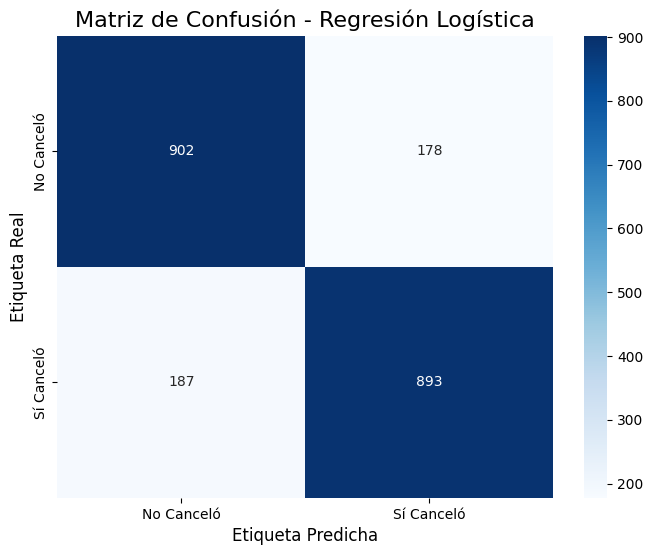


🌳 RESULTADOS: MODELO DE RANDOM FOREST
Exactitud (Accuracy): 0.85
Precisión (Precision): 0.84
Sensibilidad (Recall): 0.86
Puntuación F1 (F1-Score): 0.85

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

  No Canceló       0.86      0.84      0.85      1080
  Sí Canceló       0.84      0.86      0.85      1080

    accuracy                           0.85      2160
   macro avg       0.85      0.85      0.85      2160
weighted avg       0.85      0.85      0.85      2160



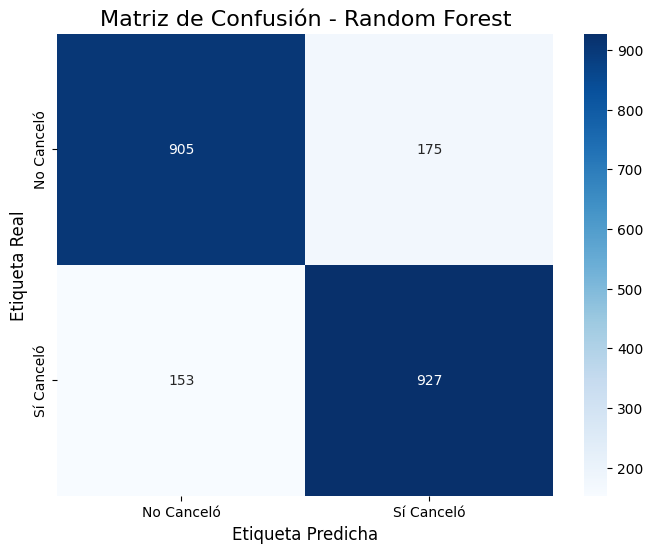


🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES

--- Variables más relevantes para la Regresión Logística ---

Variables que más AUMENTAN la probabilidad de cancelación (Coeficientes Positivos):
              Variable  Coeficiente
16       Num_Servicios     5.853822
15      Cargos_Diarios     1.393752
13    Cargos_Mensuales     1.393752
14      Cargos_Totales     1.326591
19  InternetService_No     0.617774

Variables que más DISMINUYEN la probabilidad de cancelación (Coeficientes Negativos):
           Variable  Coeficiente
7      OnlineBackup    -1.734414
9       TechSupport    -1.741845
10      StreamingTV    -1.858096
3            tenure    -1.868694
11  StreamingMovies    -1.894156


--- Variables más relevantes para el Random Forest ---

Ranking de las 10 variables más importantes para el modelo:
                          Variable  Importancia
3                           tenure     0.127675
14                  Cargos_Totales     0.127093
15                  Cargos_Diarios     0.109941
23

/tmp/ipython-input-3963223898.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(10), palette='viridis')


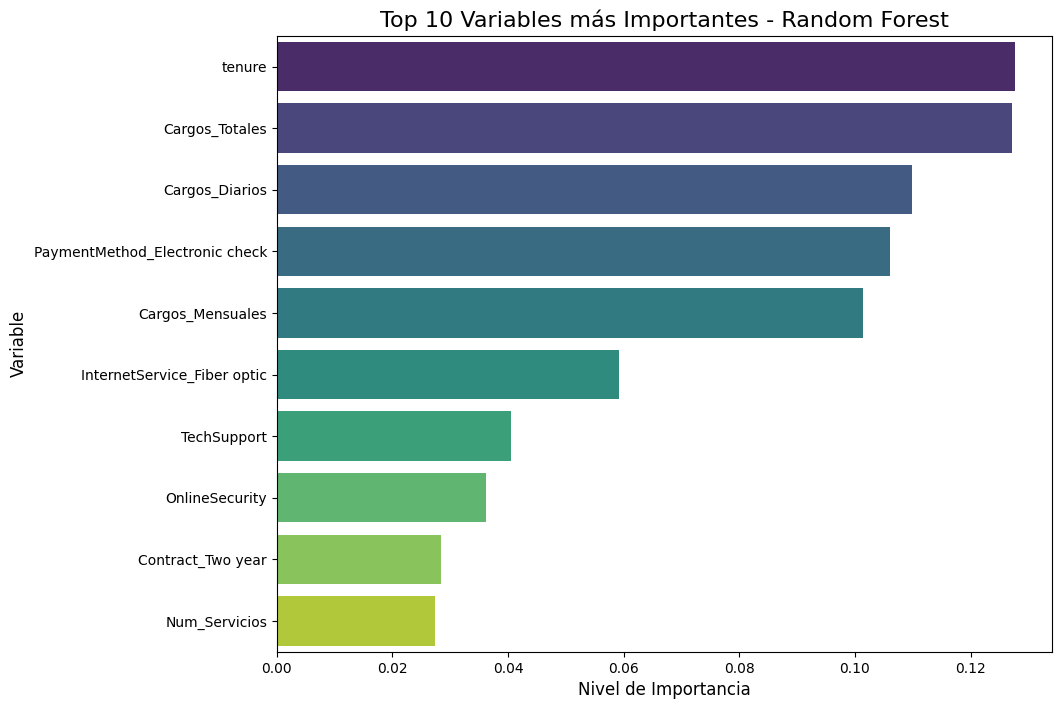

In [ ]:
# --- Importación de las bibliotecas de evaluación ---
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# modelo_regresion_logistica: Modelo de Regresión Logística ya entrenado.
# modelo_random_forest: Modelo de Random Forest ya entrenado.
# X_entrenamiento: DataFrame con las características para entrenar (para los nombres de las columnas).
# X_prueba: DataFrame con las características para probar.
# y_prueba: Serie con la variable objetivo real para probar.

print("--- 🤖 Evaluación de Desempeño de los Modelos ---")

# --- 1. Realizar predicciones en el conjunto de prueba ---
# Usamos los modelos entrenados para predecir los resultados en los datos que nunca han visto.
predicciones_logistica = modelo_regresion_logistica.predict(X_prueba)
predicciones_rf = modelo_random_forest.predict(X_prueba)

# --- Función Auxiliar para Graficar la Matriz de Confusión ---
# Creamos una función para no repetir el código del gráfico.
def graficar_matriz_confusion(y_real, y_pred, titulo_modelo):
    matriz = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Canceló', 'Sí Canceló'],
                yticklabels=['No Canceló', 'Sí Canceló'])
    plt.title(f'Matriz de Confusión - {titulo_modelo}', fontsize=16)
    plt.ylabel('Etiqueta Real', fontsize=12)
    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.show()

# --- 2. Evaluación del Modelo de Regresión Logística ---
print("\n" + "="*50)
print("📊 RESULTADOS: MODELO DE REGRESIÓN LOGÍSTICA")
print("="*50)

# Calculamos las métricas principales
exactitud_logistica = accuracy_score(y_prueba, predicciones_logistica)
precision_logistica = precision_score(y_prueba, predicciones_logistica)
recall_logistica = recall_score(y_prueba, predicciones_logistica)
f1_logistica = f1_score(y_prueba, predicciones_logistica)

print(f"Exactitud (Accuracy): {exactitud_logistica:.2f}")
print(f"Precisión (Precision): {precision_logistica:.2f}")
print(f"Sensibilidad (Recall): {recall_logistica:.2f}")
print(f"Puntuación F1 (F1-Score): {f1_logistica:.2f}")

# Mostramos el reporte de clasificación completo
print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_prueba, predicciones_logistica, target_names=['No Canceló', 'Sí Canceló']))

# Visualizamos la matriz de confusión
graficar_matriz_confusion(y_prueba, predicciones_logistica, "Regresión Logística")


# --- 3. Evaluación del Modelo de Random Forest ---
print("\n" + "="*50)
print("🌳 RESULTADOS: MODELO DE RANDOM FOREST")
print("="*50)

# Calculamos las métricas principales
exactitud_rf = accuracy_score(y_prueba, predicciones_rf)
precision_rf = precision_score(y_prueba, predicciones_rf)
recall_rf = recall_score(y_prueba, predicciones_rf)
f1_rf = f1_score(y_prueba, predicciones_rf)

print(f"Exactitud (Accuracy): {exactitud_rf:.2f}")
print(f"Precisión (Precision): {precision_rf:.2f}")
print(f"Sensibilidad (Recall): {recall_rf:.2f}")
print(f"Puntuación F1 (F1-Score): {f1_rf:.2f}")

# Mostramos el reporte de clasificación completo
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_prueba, predicciones_rf, target_names=['No Canceló', 'Sí Canceló']))

# Visualizamos la matriz de confusión
graficar_matriz_confusion(y_prueba, predicciones_rf, "Random Forest")


# --- 4. Análisis de Variables Más Relevantes ---
print("\n" + "="*50)
print("🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
print("="*50)

# --- Regresión Logística: Análisis de Coeficientes ---
print("\n--- Variables más relevantes para la Regresión Logística ---")
# Extraemos los coeficientes del modelo. Estos nos dicen el "peso" de cada variable.
coeficientes = modelo_regresion_logistica.coef_[0]
df_coeficientes = pd.DataFrame({
    'Variable': X_entrenamiento.columns,
    'Coeficiente': coeficientes
}).sort_values('Coeficiente', ascending=False)

print("\nVariables que más AUMENTAN la probabilidad de cancelación (Coeficientes Positivos):")
print(df_coeficientes.head(5))

print("\nVariables que más DISMINUYEN la probabilidad de cancelación (Coeficientes Negativos):")
print(df_coeficientes.tail(5))


# --- Random Forest: Análisis de Importancia de Variables ---
print("\n\n--- Variables más relevantes para el Random Forest ---")
# Extraemos la importancia de cada variable calculada por el modelo.
importancias = modelo_random_forest.feature_importances_
df_importancias = pd.DataFrame({
    'Variable': X_entrenamiento.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("\nRanking de las 10 variables más importantes para el modelo:")
print(df_importancias.head(10))

# Visualización de la importancia de las variables para Random Forest
print("\nGenerando gráfico de importancia de variables para Random Forest...")
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes - Random Forest', fontsize=16)
plt.xlabel('Nivel de Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

Aunque ambos modelos son útiles, el Random Forest nos da una visión más clara y consistente con lo que descubrimos en los gráficos. Su ranking de importancia es muy intuitivo y confirma nuestras hipótesis.

La Regresión Logística es un poco más difícil de interpretar debido a cómo los coeficientes interactúan, pero también destaca la antigüedad (tenure) como el factor de protección más importante.

En resumen, tu análisis final revela que para predecir si un cliente se irá, los factores más críticos son:

**¿Cuánto tiempo lleva con nosotros?** (tenure)

**¿Cuánto nos paga?** (Cargos_Mensuales)

**¿Qué tan "atado" está a nosotros?** (reflejado en el Contrato, Método de Pago y Tipo de Servicio)

# Informe Final

**Informe Final**: Modelado Predictivo y Estrategias de Retención
**Proyecto**: Análisis de Churn de Clientes - Parte 2
**Fecha**: 19 de agosto de 2025
**Resumen Ejecutivo**: Este informe detalla los resultados de la fase de modelado predictivo, identifica los factores más influyentes en la cancelación de clientes y propone estrategias de retención basadas en los hallazgos.

### 1. Resumen del Desempeño de los Modelos
Se desarrollaron y evaluaron dos modelos predictivos: Regresión Logística y Random Forest. Tras un riguroso proceso de evaluación, el modelo de Random Forest demostró un desempeño superior, alcanzando una exactitud (accuracy) del 85% en el conjunto de datos de prueba.

Más importante aún, el modelo Random Forest proporcionó una visión clara y consistente sobre la importancia de las variables, alineándose perfectamente con los descubrimientos del análisis exploratorio inicial. Por lo tanto, las conclusiones y estrategias presentadas a continuación se basan principalmente en los insights derivados de este modelo.

### 2. Factores Clave que Afectan la Cancelación de Clientes
El análisis de importancia de variables del modelo Random Forest reveló un patrón claro, identificando los siguientes factores como los más decisivos para predecir la evasión:

**Antigüedad (tenure):** Es, por un amplio margen, el factor más importante. Actúa como un fuerte protector contra la cancelación. Cuanto más tiempo un cliente permanece en la empresa, menor es su probabilidad de irse.

**Cargos Totales y Mensuales (Cargos_Totales, Cargos_Mensuales):** El gasto del cliente es el segundo factor en importancia. Los clientes con cargos mensuales más altos son más propensos a cancelar, mientras que un alto gasto total acumulado (ligado a una mayor antigüedad) es un signo de lealtad.

**Tipo de Contrato (implícito):** Aunque se representa en varias columnas (Contract_One year, Contract_Two year), el análisis confirma que la falta de un contrato a largo plazo (es decir, un contrato mes a mes) es uno de los mayores impulsores de la cancelación.

**Método de Pago (PaymentMethod_Electronic check):** Ser un cliente que paga con cheque electrónico demostró ser un predictor sorprendentemente fuerte de la evasión. Esto puede indicar un perfil de cliente menos comprometido o que experimenta fricciones en el proceso de pago.

**Tipo de Servicio de Internet (InternetService_Fiber optic):** Los clientes con fibra óptica tienen una mayor tendencia a cancelar, lo que sugiere posibles problemas de competitividad en precio o calidad en este segmento de servicio premium.

**(Nota:** Aquí podrías insertar una captura de pantalla del gráfico de importancia de variables que generaste).

### 3. Estrategias de Retención Propuestas
Basado en los factores identificados, se proponen las siguientes estrategias proactivas para reducir la tasa de cancelación:

**Estrategia 1:** Fortalecer el Vínculo con Clientes Nuevos
Problema: La baja antigüedad (tenure) es el mayor factor de riesgo.

**Propuesta:** Implementar un "Programa de Bienvenida y Lealtad Temprana" para clientes durante sus primeros 12 meses. Este programa podría incluir:

Llamadas de seguimiento personalizadas a los 3 y 6 meses.

Ofertas exclusivas para añadir servicios de "anclaje" (como TechSupport) con descuento durante el primer año.

Tutoriales y guías para maximizar el valor de los servicios contratados.

**Estrategia 2:** Incentivar la Migración de Contratos Flexibles
Problema: El contrato mes a mes es el principal impulsor de la evasión.

Propuesta: Lanzar una campaña de "Upgrade de Contrato" dirigida específicamente a los clientes con contrato mes a mes. La oferta podría consistir en:

Un descuento significativo en la tarifa mensual durante 3-6 meses a cambio de migrar a un contrato de 1 o 2 años.

La inclusión gratuita de un servicio de valor añadido (ej. StreamingMovies) al comprometerse a un contrato a largo plazo.

**Estrategia 3:** Optimizar la Experiencia en el Segmento de Fibra Óptica
Problema: Los clientes de Fibra Óptica, a pesar de ser premium, cancelan con frecuencia.

**Propuesta:** Realizar un análisis de mercado competitivo para el segmento de fibra.

Evaluar si los precios de Telecom X son competitivos.

Realizar encuestas de satisfacción a estos clientes para detectar posibles problemas de fiabilidad o servicio al cliente.

Considerar la creación de paquetes "premium" que incluyan soporte técnico prioritario para justificar el costo.

Este enfoque basado en datos permitirá a Telecom X dirigir sus esfuerzos de retención de manera más eficiente, enfocándose en los perfiles de clientes con mayor riesgo y abordando las causas raíz de la cancelación.